<a href="https://colab.research.google.com/github/vinuri-s/-angular/blob/master/SVM_detail_analysis_Original_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running **Support Vector machine** with different **kernels(linear,gaussian,polynomial)** and also tune the various parameters such as **C** ,**gamma** and **degree** to find out the best performing model .

# Importing all the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

# Reading the csv values into the dataframe

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ELOC-SW/features/features_original.csv')
df.head()

,feature_class,zero_crossing_rate - 0 - row,chroma_stft - 0 - row,chroma_stft - 1 - row,chroma_stft - 2 - row,chroma_stft - 3 - row,chroma_stft - 4 - row,chroma_stft - 5 - row,chroma_stft - 6 - row,chroma_stft - 7 - row,chroma_stft - 8 - row,chroma_stft - 9 - row,chroma_stft - 10 - row,chroma_stft - 11 - row,chroma_cqt - 0 - row,chroma_cqt - 1 - row,chroma_cqt - 2 - row,chroma_cqt - 3 - row,chroma_cqt - 4 - row,chroma_cqt - 5 - row,chroma_cqt - 6 - row,chroma_cqt - 7 - row,chroma_cqt - 8 - row,chroma_cqt - 9 - row,chroma_cqt - 10 - row,chroma_cqt - 11 - row,chroma_cens - 0 - row,chroma_cens - 1 - row,chroma_cens - 2 - row,chroma_cens - 3 - row,chroma_cens - 4 - row,chroma_cens - 5 - row,chroma_cens - 6 - row,chroma_cens - 7 - row,chroma_cens - 8 - row,chroma_cens - 9 - row,chroma_cens - 10 - row,chroma_cens - 11 - row,melspectrogram - 0 - row,melspectrogram - 1 - row,...,melspectrogram - 7 - cd1,melspectrogram - 8 - cd1,melspectrogram - 9 - cd1,melspectrogram - 10 - cd1,melspectrogram - 11 - cd1,melspectrogram - 12 - cd1,melspectrogram - 13 - cd1,melspectrogram - 14 - cd1,melspectrogram - 15 - cd1,melspectrogram - 16 - cd1,melspectrogram - 17 - cd1,melspectrogram - 18 - cd1,melspectrogram - 19 - cd1,melspectrogram - 20 - cd1,melspectrogram - 21 - cd1,melspectrogram - 22 - cd1,melspectrogram - 23 - cd1,melspectrogram - 24 - cd1,melspectrogram - 25 - cd1,melspectrogram - 26 - cd1,melspectrogram - 27 - cd1,melspectrogram - 28 - cd1,melspectrogram - 29 - cd1,mfcc - 0 - cd1,mfcc - 1 - cd1,mfcc - 2 - cd1,mfcc - 3 - cd1,mfcc - 4 - cd1,rmse - 0 - cd1,spectral_centroid - 0 - cd1,spectral_bandwidth - 0 - cd1,spectral_contrast - 0 - cd1,spectral_contrast - 1 - cd1,spectral_contrast - 2 - cd1,spectral_contrast - 3 - cd1,spectral_contrast - 4 - cd1,spectral_contrast - 5 - cd1,spectral_rolloff - 0 - cd1,poly_features - 0 - cd1,poly_features - 1 - cd1
0,1,0.036667,0.027315,0.064863,0.091160,0.080837,0.311170,0.561670,1.000000,0.787794,0.432896,0.063951,0.026873,0.042425,0.268634,0.190497,0.252820,0.414099,0.414560,1.000000,0.932159,0.823416,0.348228,0.366304,0.307330,0.146496,0.119442,0.0,0.0,0.237570,0.357012,0.591921,0.532703,0.299140,0.178352,0.178352,0.120788,0.000000,0.483933,4.533303,...,3.060275e-09,3.582024e-09,4.362631e-09,5.310534e-09,6.633415e-09,8.269482e-09,1.042788e-08,1.311285e-08,1.646706e-08,2.064142e-08,2.556336e-08,3.168906e-08,3.846353e-08,4.692491e-08,5.561935e-08,6.659603e-08,7.692751e-08,9.026572e-08,1.015064e-07,1.166251e-07,1.275890e-07,1.434573e-07,1.526000e-07,-428.956690,-36.953197,0.600343,-0.275013,0.690972,0.000010,167.850326,62.542169,0.004394,0.019004,0.102065,0.696889,3.786557,17.610805,227.0,4.835141e-07,0.000132
1,1,0.078333,0.236603,0.197802,0.096920,0.190529,0.575033,1.000000,0.996044,0.615724,0.281789,0.220250,0.114236,0.088693,0.298993,0.163514,0.227299,0.454225,0.684120,1.000000,0.530363,0.599188,0.299484,0.359870,0.273799,0.230509,0.119385,0.0,0.0,0.237440,0.356825,0.592935,0.533410,0.297300,0.177915,0.177915,0.119385,0.000000,3.950423,15.975969,...,4.377565e-07,1.141171e-07,1.315705e-07,1.695012e-06,6.481721e-06,9.248756e-06,5.293175e-06,2.473989e-06,9.988119e-06,3.245764e-05,5.140534e-05,4.063522e-05,2.047206e-05,3.794210e-05,1.107359e-04,1.758758e-04,1.403323e-04,6.839948e-05,6.730435e-05,2.201928e-04,4.178148e-04,3.983690e-04,1.826279e-04,-301.636280,-89.374808,-25.800639,-14.815135,-6.636172,0.000554,190.262152,55.176746,25.877471,9.523261,12.814395,11.163435,17.040355,13.018879,255.0,5.485607e-05,0.002058
2,1,0.081667,0.134216,0.038350,0.009427,0.026326,0.328581,1.000000,0.324581,0.024252,0.025759,0.014098,0.012190,0.041772,0.174762,0.034952,0.076704,0.236938,0.516881,1.000000,0.364344,0.116612,0.092935,0.115979,0.124486,0.138073,0.119319,0.0,0.0,0.237309,0.356629,0.593938,0.534111,0.295473,0.177483,0.177483,0.117990,0.000000,1.237929,25.777850,...,4.533162e-07,2.602315e-07,4.181746e-07,1.242815e-06,3.322694e-06,5.848767e-06,3.181834e-06,4.033081e-06,5.527599e-06,1.946978e-05,3.162997e-05,2.041

# Separating features and labels

In [4]:
X = df.drop(['feature_class'], axis=1)
y = df['feature_class']


# Checking the correlation between each feature

In [5]:
X.corr()

,zero_crossing_rate - 0 - row,chroma_stft - 0 - row,chroma_stft - 1 - row,chroma_stft - 2 - row,chroma_stft - 3 - row,chroma_stft - 4 - row,chroma_stft - 5 - row,chroma_stft - 6 - row,chroma_stft - 7 - row,chroma_stft - 8 - row,chroma_stft - 9 - row,chroma_stft - 10 - row,chroma_stft - 11 - row,chroma_cqt - 0 - row,chroma_cqt - 1 - row,chroma_cqt - 2 - row,chroma_cqt - 3 - row,chroma_cqt - 4 - row,chroma_cqt - 5 - row,chroma_cqt - 6 - row,chroma_cqt - 7 - row,chroma_cqt - 8 - row,chroma_cqt - 9 - row,chroma_cqt - 10 - row,chroma_cqt - 11 - row,chroma_cens - 0 - row,chroma_cens - 1 - row,chroma_cens - 2 - row,chroma_cens - 3 - row,chroma_cens - 4 - row,chroma_cens - 5 - row,chroma_cens - 6 - row,chroma_cens - 7 - row,chroma_cens - 8 - row,chroma_cens - 9 - row,chroma_cens - 10 - row,chroma_cens - 11 - row,melspectrogram - 0 - row,melspectrogram - 1 - row,melspectrogram - 2 - row,...,melspectrogram - 7 - cd1,melspectrogram - 8 - cd1,melspectrogram - 9 - cd1,melspectrogram - 10 - cd1,melspectrogram - 11 - cd1,melspectrogram - 12 - cd1,melspectrogram - 13 - cd1,melspectrogram - 14 - cd1,melspectrogram - 15 - cd1,melspectrogram - 16 - cd1,melspectrogram - 17 - cd1,melspectrogram - 18 - cd1,melspectrogram - 19 - cd1,melspectrogram - 20 - cd1,melspectrogram - 21 - cd1,melspectrogram - 22 - cd1,melspectrogram - 23 - cd1,melspectrogram - 24 - cd1,melspectrogram - 25 - cd1,melspectrogram - 26 - cd1,melspectrogram - 27 - cd1,melspectrogram - 28 - cd1,melspectrogram - 29 - cd1,mfcc - 0 - cd1,mfcc - 1 - cd1,mfcc - 2 - cd1,mfcc - 3 - cd1,mfcc - 4 - cd1,rmse - 0 - cd1,spectral_centroid - 0 - cd1,spectral_bandwidth - 0 - cd1,spectral_contrast - 0 - cd1,spectral_contrast - 1 - cd1,spectral_contrast - 2 - cd1,spectral_contrast - 3 - cd1,spectral_contrast - 4 - cd1,spectral_contrast - 5 - cd1,spectral_rolloff - 0 - cd1,poly_features - 0 - cd1,poly_features - 1 - cd1
zero_crossing_rate - 0 - row,1.000000,-0.030797,-0.154036,-0.202232,-0.234756,-0.174582,-0.140719,-0.229897,-0.210193,-0.120736,-0.025415,0.061284,0.039591,0.095868,0.015585,0.051409,-0.101833,-0.153724,-0.162443,-0.189390,-0.137990,-0.044603,0.056602,0.179845,0.155470,0.145872,0.066741,0.069357,-0.106463,-0.145614,-0.129053,-0.173205,-0.098996,0.000254,0.110001,0.247314,0.210849,-0.100654,-0.131330,-0.092090,...,-0.047564,-0.052823,-0.055634,-0.033457,-0.023383,-0.052237,-0.041573,-0.040961,-0.019443,-0.064169,-0.078386,-0.036797,-0.063498,-0.035946,-0.028728,-0.020236,0.004648,0.008436,-0.005799,-0.019927,-0.014560,-0.006326,-0.021850,-0.283266,0.097730,-0.067145,-0.027586,-0.046761,-0.045202,0.264803,-0.140826,0.151547,0.170824,0.115852,0.052783,-0.065335,-0.387718,0.239936,-0.027580,-0.081524
chroma_stft - 0 - row,-0.030797,1.000000,0.720080,0.468321,0.317066,0.198778,0.060772,0.072632,0.130913,0.142728,0.150896,0.236909,0.619071,0.732755,0.443646,0.311353,0.284831,0.186896,0.112549,0.194276,0.250846,0.267370,0.187633,0.259245,0.551951,0.536499,0.312975,0.105068,0.032272,-0.092149,-0.166600,-0.081670,0.073198,0.046867,0.038087,0.095276,0.399798,0.016675,-0.111153,-0.243612,...,-0.021321,-0.014809,-0.010991,0.005509,0.037024,0.037442,0.046127,0.078409,0.073067,0.049301,0.051189,0.070188,0.076953,0.086725,0.081245,0.092016,0.079132,0.084132,0.100981,0.131665,0.133327,0.084565,0.067867,0.134667,-0.267717,-0.122293,-0.166093,-0.010408,0.176707,0.015869,-0.247086,0.159474,0.197144,0.193045,0.199015,0.244324,0.200945,-0.069103,0.162196,0.134663
chroma_stft - 1 - row,-0.154036,0.720080,1.000000,0.757868,0.461396,0.180670,0.044494,0.119021,0.163009,0.156962,0.177336,0.194440,0.334529,0.594735,0.713568,0.467506,0.333506,0.145612,0.117419,0.240484,0.292769,0.272803,0.202168,0.212407,0.334061,0.448720,0.519167,0.315891,0.089158,-0.133087,-0.189752,-0.049241,0.110740,0.055143,0.027457,0.017795,0.206197,0.010938,-0.094453,-0.221961,...,-0.028313,-0.025489,-0.019102,-0.019120,-0.001083,0.036357,0.040775,0.072499,0.074801,0.058397,0.058547,0.041093,0.077353,0.096593,0.092691,0.097709,0.085076,0

# Checking whether there is any null values 

In [6]:
df.isnull().sum()

feature_class                   0
zero_crossing_rate - 0 - row    0
chroma_stft - 0 - row           0
chroma_stft - 1 - row           0
chroma_stft - 2 - row           0
                               ..
spectral_contrast - 4 - cd1     0
spectral_contrast - 5 - cd1     0
spectral_rolloff - 0 - cd1      0
poly_features - 0 - cd1         0
poly_features - 1 - cd1         0
Length: 673, dtype: int64

In [7]:
df.shape

(800, 673)

# Data Scaling - Quantile Transformer is used


In [8]:

from sklearn.preprocessing import QuantileTransformer

#quantile transform - scaling - uniform distribution
qt = QuantileTransformer(n_quantiles=100)
X = qt.fit_transform(X)


# Splitting dataset into training set and testing set for better generalisation

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)


# Running SVM with default hyperparameter.

In [10]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.95625


# Default Linear kernel

In [11]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.98125


# Default RBF kernel

In [12]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.95625


# Default Polynomial kernel

In [13]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9625


# Performing K-fold cross validation with different kernels

# CV on Linear kernel

In [14]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[1.     0.8875 0.95   0.875  0.875  0.95   1.     1.     0.975  0.85  ]


We can see above how the accuracy score is different everytime.This shows that accuracy score depends upon how the datasets got split.

In [15]:
print(scores.mean())

0.9362499999999999


In K-fold cross validation we generally take the mean of all the scores.

# CV on rbf kernel

In [16]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[1.     0.9125 0.975  0.9375 0.85   0.9875 0.9875 1.     0.975  0.7875]


In [17]:
print(scores.mean())

0.9412499999999999


# CV on Polynomial kernel

In [18]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[1.     0.8625 0.9875 0.9125 0.8875 0.9625 0.9875 1.     1.     0.8   ]


In [19]:
print(scores.mean())

0.9400000000000002


**When K-fold cross validation is done we can see different score in each iteration.This happens because when we use train_test_split method,the dataset get split in random manner into testing and training dataset.Thus it depends on how the dataset got split and which samples are training set and which samples are in testing set.**

**With K-fold cross validation we can see that the dataset got split into 10 equal parts thus covering all the data into training as well into testing set.This is the reason we got 10 different accuracy score.**

### Taking all the values of C and checking out the accuracy score with kernel as linear.

**The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.**

**Thus for a very large values we can cause overfitting of the model and for a very small value of C we can cause underfitting.Thus the value of C must be chosen in such a manner that it generalised the unseen data well**

In [20]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999]


Text(0, 0.5, 'Cross-Validated Accuracy')

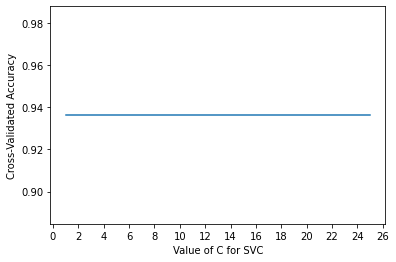

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline


C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

### Let us look into more detail of what is the exact value of C which is giving us a good accuracy score

In [22]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.9362499999999999, 0.9349999999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999, 0.9362499999999999,

Text(0, 0.5, 'Cross-Validated Accuracy')

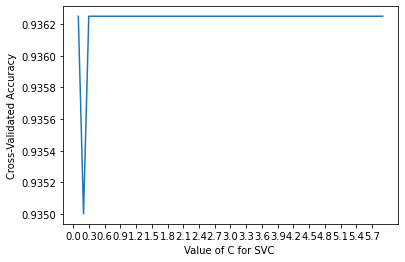

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

C_values=list(np.arange(0.1,6,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

### Taking kernel as **rbf** and taking different values gamma

**Technically, the gamma parameter is the inverse of the standard deviation of the RBF kernel (Gaussian function), which is used as similarity measure between two points. Intuitively, a small gamma value define a Gaussian function with a large variance. In this case, two points can be considered similar even if are far from each other. In the other hand, a large gamma value means define a Gaussian function with a small variance and in this case, two points are considered similar just if they are close to each other**

In [24]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.8412499999999999, 0.9237500000000001, 0.94375, 0.9112500000000001, 0.5, 0.5, 0.5]


Text(0, 0.5, 'Cross-Validated Accuracy')

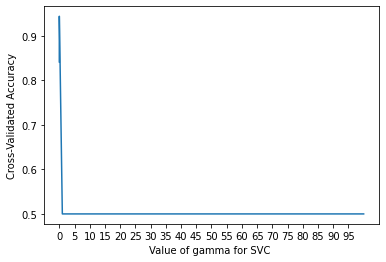

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

In [26]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.8412499999999999, 0.9237500000000001, 0.94375, 0.9112500000000001]


Text(0, 0.5, 'Cross-Validated Accuracy')

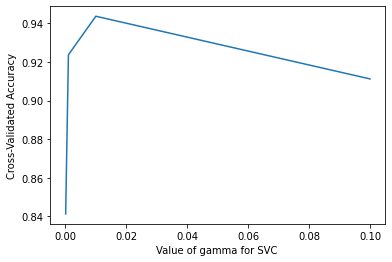

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

The score increases steadily and reaches its peak  and then decreases.

more details for gamma values

In [28]:
gamma_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.94375, 0.9412499999999999, 0.9412499999999999, 0.9400000000000001, 0.94375]


Text(0, 0.5, 'Cross-Validated Accuracy')

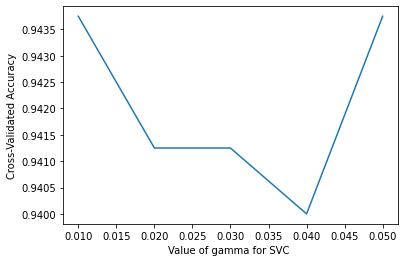

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.01,0.02,0.03,0.04,0.05]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

# Taking polynomial kernel with different degree

In [30]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.93625, 0.9400000000000002, 0.9412499999999999, 0.93125, 0.9237500000000001]


Text(0, 0.5, 'Cross-Validated Accuracy')

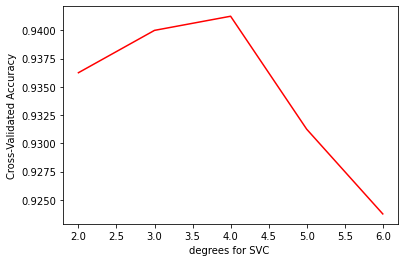

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

degree=[2,3,4,5,6]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

# performing SVM by taking hyperparameter C=0.1 and kernel as linear 


----------

In [32]:
from sklearn.svm import SVC
svc= SVC(kernel='linear',C=0.1)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.96875


# With K-fold cross validation(where K=10)

In [33]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear',C=0.1)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)

[1.     0.9    0.9375 0.9    0.8625 0.9625 1.     1.     0.975  0.825 ]


Taking the mean of all the scores

In [34]:
print(scores.mean())

0.9362499999999999


# performing SVM by taking hyperparameter gamma=0.01 and kernel as rbf

In [35]:
from sklearn.svm import SVC
svc= SVC(kernel='rbf',gamma=0.01)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

0.9625

# With K-fold cross validation(where K=10)

In [36]:
svc=SVC(kernel='linear',gamma=0.01)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[1.     0.8875 0.95   0.875  0.875  0.95   1.     1.     0.975  0.85  ]
0.9362499999999999


# performing SVM by taking hyperparameter degree=3 and kernel as poly

In [37]:
from sklearn.svm import SVC
svc= SVC(kernel='poly',degree=3)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.9625


# With K-fold cross validation(where K=10)

In [38]:
svc=SVC(kernel='poly',degree=3)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[1.     0.8625 0.9875 0.9125 0.8875 0.9625 0.9875 1.     1.     0.8   ]
0.9400000000000002


#perform Grid search technique to find the best parameter

In [39]:
from sklearn.svm import SVC
svm_model= SVC()

In [40]:
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }

In [41]:
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [42]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.9765625


In [43]:
# print(model_svm.grid_scores_)

In [44]:
print(model_svm.best_params_)

{'C': 0.30000000000000004, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}


In [45]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.9625
